## Loading the dataset

In [1]:
import pandas as pd
df = pd.read_csv("perceptron_toydata-truncated.txt", sep = "\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [2]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values
X_train.shape, y_train.shape

((20, 2), (20,))

In [3]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [4]:
import numpy as np
np.bincount(y_train)

array([10, 10], dtype=int64)

In [5]:
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [6]:
X_train[y_train == 0][:, 0]

array([ 0.77, -0.33,  0.91, -0.37, -0.63,  0.39, -0.49, -0.68, -0.1 ,
       -0.05])

## Visualizing the data

Text(0, 0.5, 'Feature $x_2$')

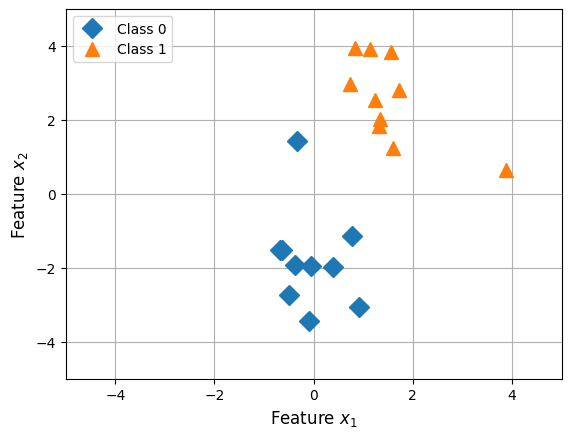

In [7]:
import matplotlib.pyplot as plt
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker = "D",
    markersize = 10,
    linestyle = "",
    label = "Class 0"
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker = "^",
    markersize = 10,
    linestyle = "",
    label = "Class 1"
)

plt.grid()
plt.legend(loc = "upper left")
plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize = 12)
plt.ylabel("Feature $x_2$", fontsize = 12)

## Feature normalization 

Allows grdaient descent to converge more quickly since gradients are all in the same range.

Let's cover a small but critical concept essential for training neural networks well: **input feature normalization.**

$$
z_{score} = \frac{x - \mu}{\sigma}
$$

Min-max normalization/ 0-1 normalization:
$$
x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

In [8]:
X_train = (X_train - X_train.mean(axis = 0)) / (X_train.std(axis = 0))

Text(0, 0.5, 'Feature $x_2$')

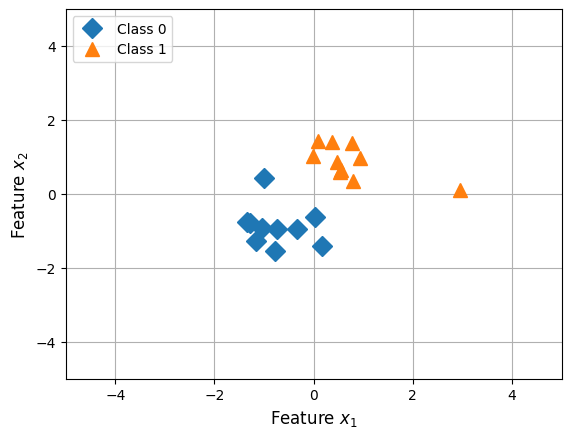

In [9]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker = "D",
    markersize = 10,
    linestyle = "",
    label = "Class 0"

)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker = "^",
    markersize = 10,
    linestyle = "",
    label = "Class 1"
)

plt.grid()
plt.legend(loc = "upper left")
plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize = 12)
plt.ylabel("Feature $x_2$", fontsize = 12)



## Implementing Logistic Regression using Pytorch

In [10]:
import torch
import torch.nn as nn

class LogisticRegression(nn.Module):
    """
    Logistic Regression Model
    """

    def __init__(self, num_features):
        super().__init__()

        self.linear = nn.Linear(in_features = num_features, out_features = 1)
        self.act = nn.Sigmoid()

    def forward(self, x):
        logits = self.linear(x)
        probas = self.act(logits)
        return probas

In [11]:
# Instantiate model
torch.manual_seed(1)
model = LogisticRegression(num_features = 2)

# Put model in evaluation mode
model.eval()
x = torch.tensor([1.1, 2.2])

# Deactivate gradient tracking
with torch.inference_mode():
    probas = model(x)

print("Probability of class 1:", probas.item())

Probability of class 1: 0.3958173990249634


## Defining a Dataser and a DataLoader

The `Dataset` class represents the underlying data, provides an interface to access and augment individual samples, and can be customized to handle different data formats. Itimplements the __len__ and __getitem__ methods The __len__ method should return the total number of samples in the dataset, and the __getitem__ method should take an index as input and return the corresponding sample from the dataset.

The DataLoader class sits on top of the Dataset and handles aspects like batching, shuffling, and parallel loading of data. Together, they provide a powerful mechanism for handling and processing data in PyTorch.

In [12]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    """
    Custom Dataset 
    """

    def __init__(self, X, y):
        self.features = torch.tensor(X, dtype = torch.float32)
        self.labels = torch.tensor(y, dtype = torch.float32)

    # Gets called when we do len(dataset)
    def __len__(self):
        return self.labels.shape[0]
    
    # Gets called when we do dataset[i]
    def __getitem__(self, index):
        x = self.features[index]
        y = self.labels[index]
        return x, y
    
# Instantiate dataset object
train_ds = MyDataset(X = X_train, y = y_train)

len(train_ds), train_ds[1]

# Create data loader to load data in batches
train_dl = DataLoader(dataset = train_ds, batch_size = 10, shuffle = True)

# Iterate over batches
next(iter(train_dl))

[tensor([[ 0.7741,  1.3908],
         [ 0.5388,  0.5851],
         [-1.2870, -0.7765],
         [ 2.9575,  0.1017],
         [-1.3340, -0.7724],
         [-0.7411, -0.9457],
         [ 0.0871,  1.4270],
         [ 0.1623, -1.3968],
         [ 0.5576,  0.6576],
         [-1.0046,  0.4200]]),
 tensor([1., 1., 0., 1., 0., 0., 1., 0., 1., 0.])]

In [13]:
f, l = next(iter(train_dl))

In [14]:
r = model(f)

In [15]:
r.shape

torch.Size([10, 1])

In [16]:
l.shape

torch.Size([10])

In [17]:
l.view([10, 1]).shape

torch.Size([10, 1])

In [18]:
probas.shape

torch.Size([1])

## Training and evaluating the model (naively)

In [21]:
import torch.nn.functional as F

torch.manual_seed(1)
model = LogisticRegression(num_features = 2)
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
num_epochs = 20

# Training loop
for epoch in range(num_epochs):
    # Put model in training mode
    model.train()
    losses = []
    for batch_idx, (features, class_labels) in enumerate(train_dl):

        # Forward pass
        probas = model(features)

        # Compute loss
        loss = F.binary_cross_entropy(probas, class_labels.view(probas.shape)) # View to make sure shapes match

        # Zero previous gradients
        optimizer.zero_grad()

        # Backpropagation to compute gradients
        loss.backward()

        # Update model parameters
        optimizer.step()

        # Store loss
        losses.append(loss.item())

    #### Evaluate the model ####
    model.eval() # Put model in evaluation mode
    correct = 0
    total_examples = 0
    # Deactivate gradient tracking
    with torch.inference_mode():
        for batch_idx, (features, class_labels) in enumerate(train_dl):
            probas = model(features)
            predicted_labels = torch.where(probas > 0.5, 1, 0)
            lab = class_labels.view(predicted_labels.shape).to(predicted_labels.dtype)
            correct += torch.sum(predicted_labels == lab)
            total_examples += len(predicted_labels)

        print(f"Epoch {epoch + 1}, loss: {np.mean(losses):.4f}, accuracy: { (correct / total_examples)*100:.2f}")

    



Epoch 1, loss: 0.7020, accuracy: 50.00
Epoch 2, loss: 0.6707, accuracy: 55.00
Epoch 3, loss: 0.6419, accuracy: 70.00
Epoch 4, loss: 0.6164, accuracy: 75.00
Epoch 5, loss: 0.5889, accuracy: 80.00
Epoch 6, loss: 0.5660, accuracy: 85.00
Epoch 7, loss: 0.5430, accuracy: 90.00
Epoch 8, loss: 0.5222, accuracy: 90.00
Epoch 9, loss: 0.5032, accuracy: 95.00
Epoch 10, loss: 0.4852, accuracy: 95.00
Epoch 11, loss: 0.4680, accuracy: 100.00
Epoch 12, loss: 0.4522, accuracy: 100.00
Epoch 13, loss: 0.4372, accuracy: 100.00
Epoch 14, loss: 0.4235, accuracy: 100.00
Epoch 15, loss: 0.4098, accuracy: 100.00
Epoch 16, loss: 0.3974, accuracy: 100.00
Epoch 17, loss: 0.3859, accuracy: 100.00
Epoch 18, loss: 0.3747, accuracy: 100.00
Epoch 19, loss: 0.3640, accuracy: 100.00
Epoch 20, loss: 0.3544, accuracy: 100.00


## Plot decision boundary

In [39]:
def plot_boundary(model):
    w1 = model.linear.weight[0][0].item()
    w2 = model.linear.weight[0][1].item()
    b = model.linear.bias.detach()

    x1_min = -20
    x2_min = -(w1*x1_min +b)/w2

    x1_max = 20
    x2_max = -(w1*x1_max +b)/w2

    return x1_min, x2_min.item(), x1_max, x2_max.item()

-20 42.888038635253906 20 -42.46192169189453


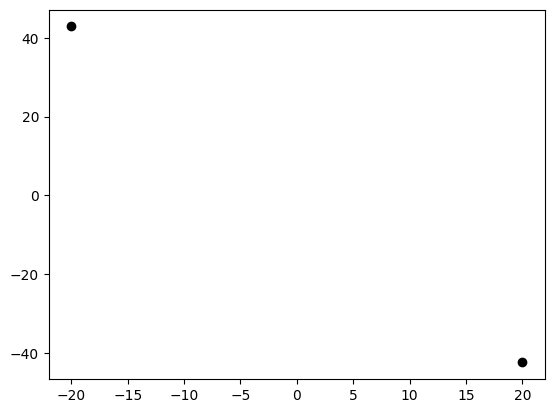

In [45]:
x1_min, x2_min, x1_max, x2_max = plot_boundary(model)
print(x1_min, x2_min, x1_max, x2_max)
plt.plot([x1_min, x1_max], [x2_min, x2_max], color = "black")

-20 42.888038635253906 20 -42.46192169189453


Text(0, 0.5, 'Feature $x_2$')

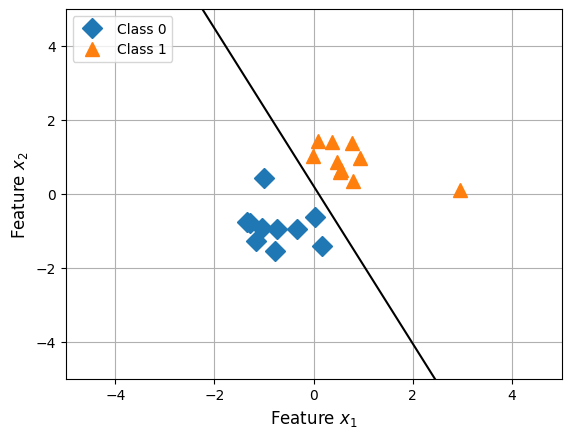

In [46]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker = "D",
    markersize = 10,
    linestyle = "",
    label = "Class 0"

)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker = "^",
    markersize = 10,
    linestyle = "",
    label = "Class 1"
)
x1_min, x2_min, x1_max, x2_max = plot_boundary(model)
print(x1_min, x2_min, x1_max, x2_max)
plt.plot([x1_min, x1_max], [x2_min, x2_max], color = "black")
plt.grid()
plt.legend(loc = "upper left")
plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize = 12)
plt.ylabel("Feature $x_2$", fontsize = 12)



In [38]:
x1_min, x2_min, x1_max, x2_max

(-20, tensor([42.8880]), 20, tensor([-42.4619]))

In [30]:
model.linear.bias

Parameter containing:
tensor([-0.0827], requires_grad=True)